# Overfitting

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# define symbols for the size of the dataset and the degree o polynomials.
# they will be used later on
dataset_size = 20
polynomial_degree = 10

In this exercise we will work with a noisy dataset defined as X = $(x, x + \epsilon)$ with $\epsilon \sim \mathcal{N}(0, 0.1)$. We generate `dataset_size` examples for the training set and `dataset_size` examples for the test set.

Note that the perfect model is the bisector: the difference is the added noise (not predicible, thus unavoidable)

In [3]:
noise_train = np.random.normal(0, 0.1, dataset_size)
noise_test = np.random.normal(0, 0.1, dataset_size)

# The sorting is only a trick to simplify the plot code
x_train = np.sort(np.random.rand(dataset_size))
x_test = np.sort(np.random.rand(dataset_size))

y_train = x_train + noise_train
y_test = x_test + noise_test

Let's visualize the dataset and the bisector

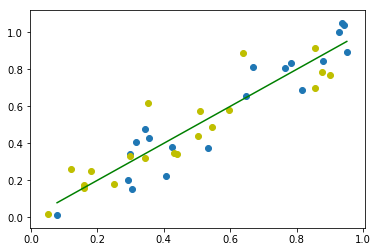

In [4]:
plt.scatter(x_train,y_train)
plt.scatter(x_test, y_test, color='y')
plt.plot(x_train,x_train,color='g')

Let us fit to the data a polynomial of the chosen degree. To this end we will use scikit-learn PolynomialFeatures function which maps the features in the dataset into a larger space such that a linear model in that space corresponds to a polynomial model in the original space.

In [5]:
poly = PolynomialFeatures(degree=polynomial_degree)
x_train_ = poly.fit_transform([[z] for z in x_train])
x_test_ = poly.fit_transform([[z] for z in x_test])
clf = linear_model.LinearRegression()
clf.fit(x_train_, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

and visualize how the classifier fits the training data

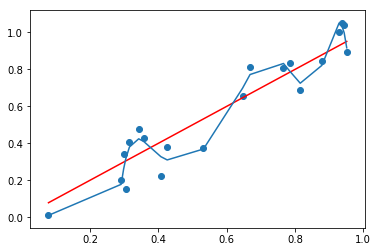

In [6]:
plt.scatter(x_train, y_train)
plt.plot(x_train, x_train, color='r')
plt.plot(x_train, clf.predict(x_train_))

and the test data

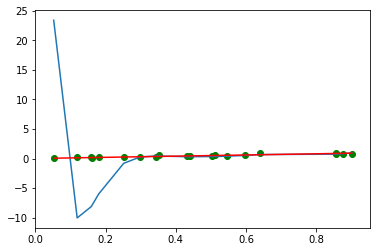

In [7]:
plt.scatter(x_test, y_test, color='g')
plt.plot(x_test, clf.predict(x_test_))
plt.plot(x_test, x_test, color = 'r')

We see that the performances on the test data are not that good. The following exercise asks you to quantify this observation by calculating the classifier and the bisector mean squared error on the training set and on the test set.

# Esercizio

The mean squared error of a classifier $c$ over a dataset $X=\{(x_i, y_i)\}_{i=1}^n$ is defined as:

$$
mse = \sum_{i=1}^n \frac{(c(x_i) - y_i)^2}{n}
$$

1. calculate the mean squared error of `clf` and of the first quadrant bisector over the training set
1. calculate the mean squared error of `clf` and of the first quadrant bisector over the test set
1. based only on `clf` performances on the training set, would have you predicted its performances on the test set?
1. based only on the bisector performances on the training set, would have you predicted its performances on the test set?

MSE:0.003279 of the classifier over all the train data
MSE:0.006886 of the the first quadrant bisector


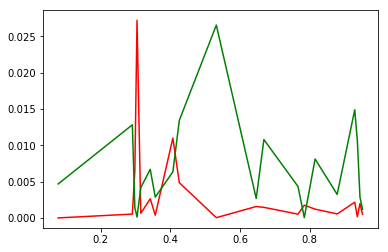

In [8]:
#calculate the mean squared error of clf and of the first quadrant bisector over the training set
mse =0
train_set = clf.predict(x_train_)
#test_set = clf.predict(x_test_)
def getErrorTrain(y_true,y_pred):
    # cxi - yi --> ERROR
    errors = np.subtract(y_true,y_pred)
    # ^ 2 --> SQUARE ERROR
    errors = np.multiply(errors,errors)
    # mean square error
    return errors,np.sum(errors  / errors.shape[0])
errors,mse_error = getErrorTrain(train_set,y_train)
l = len(y_train) / 2

errors_bi,mse_error_bi = getErrorTrain(train_set,x_train)
#plt.hist(errors)
#plt.plot(x_train,errors,color='r')
#plt.plot(x_train,x_train,color='g')
plt.plot(x_train,errors,color='r')
plt.plot(x_train,errors_bi,color='g')
print ("MSE:%f of the classifier over all the train data" % mse_error)
print ("MSE:%f of the the first quadrant bisector" % mse_error_bi)
    

MSE TEST:41.418954 of the classifier the test data
MSE TEST:0.012447 of the first bisector quadrant


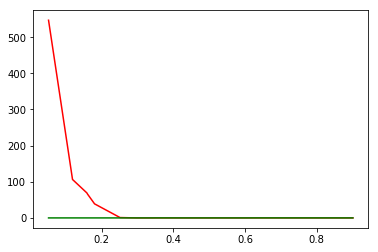

In [9]:
#calculate the mean squared error of clf and of the first quadrant bisector over the test set
test_set = clf.predict(x_test_)
errors_test,err_test = getErrorTrain(y_test,test_set)
#plt.plot(x_test,errors_test,color='r')
#plt.plot(x_test,x_test,color='g')

print ("MSE TEST:%f of the classifier the test data" % err_test)
l_test = len(y_test) / 2
errors_test_b,err_test_b = getErrorTrain(y_test,x_test)
print ("MSE TEST:%f of the first bisector quadrant" % err_test_b)
plt.plot(x_test,errors_test,color="r")
plt.plot(x_test,errors_test_b,color="g")

In [10]:
# Test the metric square
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, test_set)
print("Sklean - mse:%f", mse - err_test)

Sklean - mse:%f -7.1054273576e-15


Based only on clf performances on the training set, would have you predicted its performances on the test set?

By only looking at the performance over the training set we should have been pretty confidence on the performance over the result set. 


Over difference iteration the result over the test set can yeld very difference results due to the random selection of the data: the linear regression it's know to perform to predict with greater error for data point outside of the training data.